#About Dataset

**Konteks <br>**
Otoritas Statistik Filipina (PSA) mempelopori pelaksanaan Survei Pendapatan dan Pengeluaran Keluarga (FIES) secara nasional. Survei yang dilakukan setiap tiga (3) tahun sekali ini bertujuan untuk menyediakan data pendapatan dan pengeluaran keluarga, antara lain, tingkat konsumsi menurut jenis pengeluaran, sumber pendapatan dalam bentuk tunai, dan informasi terkait yang mempengaruhi pendapatan dan pengeluaran. tingkat dan pola di Filipina.



**Konten<br>**
Di dalam kumpulan data ini terdapat beberapa variabel terpilih dari Survei Pendapatan dan Pengeluaran Keluarga (FIES) terbaru di Filipina. Ini berisi lebih dari 40 ribu observasi dan 60 variabel yang terutama terdiri dari pendapatan dan pengeluaran rumah tangga dari rumah tangga tersebut



**Ucapan Terima Kasih<br>**
Otoritas Statistik Filipina yang menyediakan data mentah kepada penerbit



**Inspirasi<br>**
Model klasifikasi sosio-ekonomi di Filipina sangat problematis. Faktanya, tidak ada satu pun model SEC yang diterima secara luas. Badan-badan pemerintah menggunakan model SEC mereka sendiri dan lembaga penelitian swasta menggunakan model mereka sendiri. Kita semua tahu bahwa pendapatan rumah tangga merupakan indikator terbesar klasifikasi sosial ekonomi seseorang, oleh karena itu penerbit ingin mengetahui hal berikut:



1) Model terbaik dalam memprediksi pendapatan rumah tangga
2) Penggerak utama pendapatan rumah tangga, kami ingin membuat model ini sesedikit mungkin
3) Beberapa analisis eksplorasi dalam data juga akan berguna

Dataset source : https://www.kaggle.com/datasets/grosvenpaul/family-income-and-expenditure

# Import Library and Dataset

In [ ]:
import pandas as pd
import gdown
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Helper Function
def import_from_gdrive(id_file, file_name, sheet_name=None):
    link = 'https://drive.google.com/uc?id=' + id_file
    output_file = '/content/' + file_name
    gdown.download(link, output_file, quiet=False)

    df = pd.read_excel(output_file)
    return df

In [ ]:
id_data = '1JVdkaafSnloJml9nMVmZmgkf4Zknhn2F'
df = import_from_gdrive(id_data, 'Converted Dataset Family Income and Expenditure.xlsx')
print("Suscess import dataset!")

Downloading...
From: https://drive.google.com/uc?id=1JVdkaafSnloJml9nMVmZmgkf4Zknhn2F
To: /content/Converted Dataset Family Income and Expenditure.xlsx
100%|██████████| 41.1M/41.1M [00:01<00:00, 37.3MB/s]


Suscess import dataset!


# Data Understanding and Cleaning



In [ ]:
df.head()

,Total Household Income,Unnamed: 1,Unnamed: 2,Region,Total Food Expenditure,Unnamed: 5,Unnamed: 6,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Unnamed: 10,Unnamed: 11,Total Rice Expenditure,Unnamed: 13,Unnamed: 14,Meat Expenditure,Unnamed: 16,Unnamed: 17,Total Fish and marine products Expenditure,Unnamed: 19,Unnamed: 20,Fruit Expenditure,Unnamed: 22,Unnamed: 23,Vegetables Expenditure,Unnamed: 25,Unnamed: 26,Restaurant and hotels Expenditure,Unnamed: 28,Unnamed: 29,Alcoholic Beverages Expenditure,Unnamed: 31,Unnamed: 32,Tobacco Expenditure,Unnamed: 34,Unnamed: 35,"Clothing, Footwear and Other Wear Expenditure",Unnamed: 37,Unnamed: 38,Housing and water Expenditure,Unnamed: 40,Unnamed: 41,Imputed House Rental Value,Unnamed: 43,Unnamed: 44,Medical Care Expenditure,Unnamed: 46,Unnamed: 47,Transportation Expenditure,Unnamed: 49,Unnamed: 50,Communication Expenditure,Unnamed: 52,Unnamed: 53,Education Expenditure,Unnamed: 55,Unnamed: 56,Miscellaneous Goods and Services Expenditure,Unnamed: 58,Unnamed: 59,Special Occasions Expenditure,Unnamed: 61,Unnamed: 62,Crop Farming and Gardening expenses,Unnamed: 64,Unnamed: 65,Total Income from Entrepreneurial Acitivites,Unnamed: 67,Unnamed: 68,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,635834.6817,1.758717e+08,CAR,117848,156000.11150,43149593.06,Wage/Salaries,0,42140,55782.40360,1.542940e+07,38300,50699.24200,1.402340e+07,24676,32664.60824,9035022.728,16806,22246.77444,6.153452e+06,3325,4401.4355,1.217436e+06,13460,17817.54040,4928327.359,3000,3971.2200,1.098438e+06,0,0.0000,0.00000,0,0.00000,0.000000e+00,4607,6098.47018,1.686835e+06,63636,84237.51864,2.330008e+07,30000,39712.200,1.098438e+07,3457,4576.16918,1.265767e+06,4776,6322.18224,1.748714e+06,2880,3812.3712,1.054501e+06,36200,47919.3880,1.325449e+07,34056,47919.3880,1.325449e+07,7200,9530.928,2.636252e+06,19370,25640.84380,7092251.185,44370,25640.84380,7092251.185,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,262411.5989,7.258298e+07,CAR,67766,89704.56484,24812260.91,Wage/Salaries,0,17329,22939.09046,6.344947e+06,13008,17219.20992,4.762829e+06,17434,23078.08316,6383392.213,11073,14657.77302,4.054336e+06,2035,2693.8109,7.451074e+05,7833,10368.85542,2868022.898,2360,3124.0264,8.641049e+05,960,1270.7904,351500.31690,2132,2822.21368,7.806236e+05,8230,10894.38020,3.013383e+06,41370,54763.12380,1.514747e+07,27000,35740.980,9.885946e+06,3520,4659.56480,1.288834e+06,12900,17076.24600,4.723286e+06,5700,7545.3180,2.087033e+06,29300,38785.5820,1.072808e+07,9150,38785.5820,1.072808e+07,1500,1985.610,5.492192e+05,0,0.00000,0.000,0,0.00000,0.000,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishmen

In [ ]:
# Drop kolom yg berisi mata uang Filipina
list_to_drop = ['Total Household Income', 'Unnamed: 1',
                'Total Food Expenditure', 'Unnamed: 5',
                'Bread and Cereals Expenditure', 'Unnamed: 10',
                'Total Rice Expenditure', 'Unnamed: 13',
                'Meat Expenditure',  'Unnamed: 16',
                'Total Fish and  marine products Expenditure', 'Unnamed: 19',
                'Fruit Expenditure', 'Unnamed: 22',
                'Vegetables Expenditure', 'Unnamed: 25',
                'Restaurant and hotels Expenditure', 'Unnamed: 28',
                'Alcoholic Beverages Expenditure', 'Unnamed: 31',
                'Tobacco Expenditure', 'Unnamed: 34',
                'Clothing, Footwear and Other Wear Expenditure', 'Unnamed: 37',
                'Housing and water Expenditure',  'Unnamed: 40',
                'Imputed House Rental Value', 'Unnamed: 43',
                'Medical Care Expenditure', 'Unnamed: 46',
                'Transportation Expenditure', 'Unnamed: 49',
                'Communication Expenditure', 'Unnamed: 52',
                'Education Expenditure', 'Unnamed: 55',
                'Miscellaneous Goods and Services Expenditure', 'Unnamed: 58',
                'Special Occasions Expenditure', 'Unnamed: 61',
                'Crop Farming and Gardening expenses', 'Unnamed: 64',
                'Total Income from Entrepreneurial Acitivites', 'Unnamed: 67']

df.drop(columns=list_to_drop, inplace=True)

In [ ]:
# Mengganti nama kolom
column_mapping = {
    'Unnamed: 2': 'Total Household Income',
    'Unnamed: 6': 'Total Food Expenditure',
    'Unnamed: 11': 'Bread and Cereals Expenditure',
    'Unnamed: 14': 'Total Rice Expenditure',
    'Unnamed: 17': 'Meat Expenditure',
    'Unnamed: 20': 'Total Fish and  marine products Expenditure',
    'Unnamed: 23': 'Fruit Expenditure',
    'Unnamed: 26': 'Vegetables Expenditure',
    'Unnamed: 29': 'Restaurant and hotels Expenditure',
    'Unnamed: 32': 'Alcoholic Beverages Expenditure',
    'Unnamed: 35': 'Tobacco Expenditure',
    'Unnamed: 38': 'Clothing, Footwear and Other Wear Expenditure',
    'Unnamed: 41': 'Housing and water Expenditure',
    'Unnamed: 44': 'Imputed House Rental Value',
    'Unnamed: 47': 'Medical Care Expenditure',
    'Unnamed: 50': 'Transportation Expenditure',
    'Unnamed: 53': 'Communication Expenditure',
    'Unnamed: 56': 'Education Expenditure',
    'Unnamed: 59': 'Miscellaneous Goods and Services Expenditure',
    'Unnamed: 62': 'Special Occasions Expenditure',
    'Unnamed: 65': 'Crop Farming and Gardening expenses',
    'Unnamed: 68': 'Total Income from Entrepreneurial Acitivites',
}

df.rename(columns=column_mapping, inplace=True)

In [ ]:
for col in df.columns:
    print(col)

Total Household Income
Region
Total Food Expenditure
Main Source of Income
Agricultural Household indicator
Bread and Cereals Expenditure
Total Rice Expenditure
Meat Expenditure
Total Fish and  marine products Expenditure
Fruit Expenditure
Vegetables Expenditure
Restaurant and hotels Expenditure
Alcoholic Beverages Expenditure
Tobacco Expenditure
Clothing, Footwear and Other Wear Expenditure
Housing and water Expenditure
Imputed House Rental Value
Medical Care Expenditure
Transportation Expenditure
Communication Expenditure
Education Expenditure
Miscellaneous Goods and Services Expenditure
Special Occasions Expenditure
Crop Farming and Gardening expenses
Total Income from Entrepreneurial Acitivites
Household Head Sex
Household Head Age
Household Head Marital Status
Household Head Highest Grade Completed
Household Head Job or Business Indicator
Household Head Occupation
Household Head Class of Worker
Type of Household
Total Number of Family members
Members with age less than 5 year old


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Total Household Income                         41544 non-null  float64
 1   Region                                         41544 non-null  object 
 2   Total Food Expenditure                         41544 non-null  float64
 3   Main Source of Income                          41544 non-null  object 
 4   Agricultural Household indicator               41544 non-null  int64  
 5   Bread and Cereals Expenditure                  41544 non-null  float64
 6   Total Rice Expenditure                         41544 non-null  float64
 7   Meat Expenditure                               41544 non-null  float64
 8   Total Fish and  marine products Expenditure    41544 non-null  float64
 9   Fruit Expenditure                              415

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
categorical_df = df.select_dtypes(include=['object'])

In [ ]:
print("Numeric Feature : ")
for col in numeric_df.columns:
    print(col)

print("\n\nCategorical Feature : ")
for col in categorical_df.columns:
    print(col)

Numeric Feature : 
Total Household Income
Total Food Expenditure
Agricultural Household indicator
Bread and Cereals Expenditure
Total Rice Expenditure
Meat Expenditure
Total Fish and  marine products Expenditure
Fruit Expenditure
Vegetables Expenditure
Restaurant and hotels Expenditure
Alcoholic Beverages Expenditure
Tobacco Expenditure
Clothing, Footwear and Other Wear Expenditure
Housing and water Expenditure
Imputed House Rental Value
Medical Care Expenditure
Transportation Expenditure
Communication Expenditure
Education Expenditure
Miscellaneous Goods and Services Expenditure
Special Occasions Expenditure
Crop Farming and Gardening expenses
Total Income from Entrepreneurial Acitivites
Household Head Age
Total Number of Family members
Members with age less than 5 year old
Members with age 5 - 17 years old
Total number of family members employed
House Floor Area
House Age
Number of bedrooms
Electricity
Number of Television
Number of CD/VCD/DVD
Number of Component/Stereo set
Number of

In [ ]:
for col in df.columns:
    print(col)

Total Household Income
Region
Total Food Expenditure
Main Source of Income
Agricultural Household indicator
Bread and Cereals Expenditure
Total Rice Expenditure
Meat Expenditure
Total Fish and  marine products Expenditure
Fruit Expenditure
Vegetables Expenditure
Restaurant and hotels Expenditure
Alcoholic Beverages Expenditure
Tobacco Expenditure
Clothing, Footwear and Other Wear Expenditure
Housing and water Expenditure
Imputed House Rental Value
Medical Care Expenditure
Transportation Expenditure
Communication Expenditure
Education Expenditure
Miscellaneous Goods and Services Expenditure
Special Occasions Expenditure
Crop Farming and Gardening expenses
Total Income from Entrepreneurial Acitivites
Household Head Sex
Household Head Age
Household Head Marital Status
Household Head Highest Grade Completed
Household Head Job or Business Indicator
Household Head Occupation
Household Head Class of Worker
Type of Household
Total Number of Family members
Members with age less than 5 year old


In [ ]:
fix_columns =['Household Head Sex','Household Head Age','Household Head Marital Status','Household Head Highest Grade Completed',
              'Total Household Income','Region','ype of Building/House','House Floor Area','Number of bedrooms','Electricity','Tenure Status',
              'Type of Household','Total Number of Family members','Total number of family members employed',
              'Number of Car, Jeep, Van','Number of Motorcycle/Tricycle','Number of Television','Number of Airconditioner',
              'Number of Personal Computer','Number of Cellular phone','Number of Refrigerator/Freezer','Number of Washing Machine']

# Cleaning Dataset

In [ ]:
import missingno as msno

<Axes: >

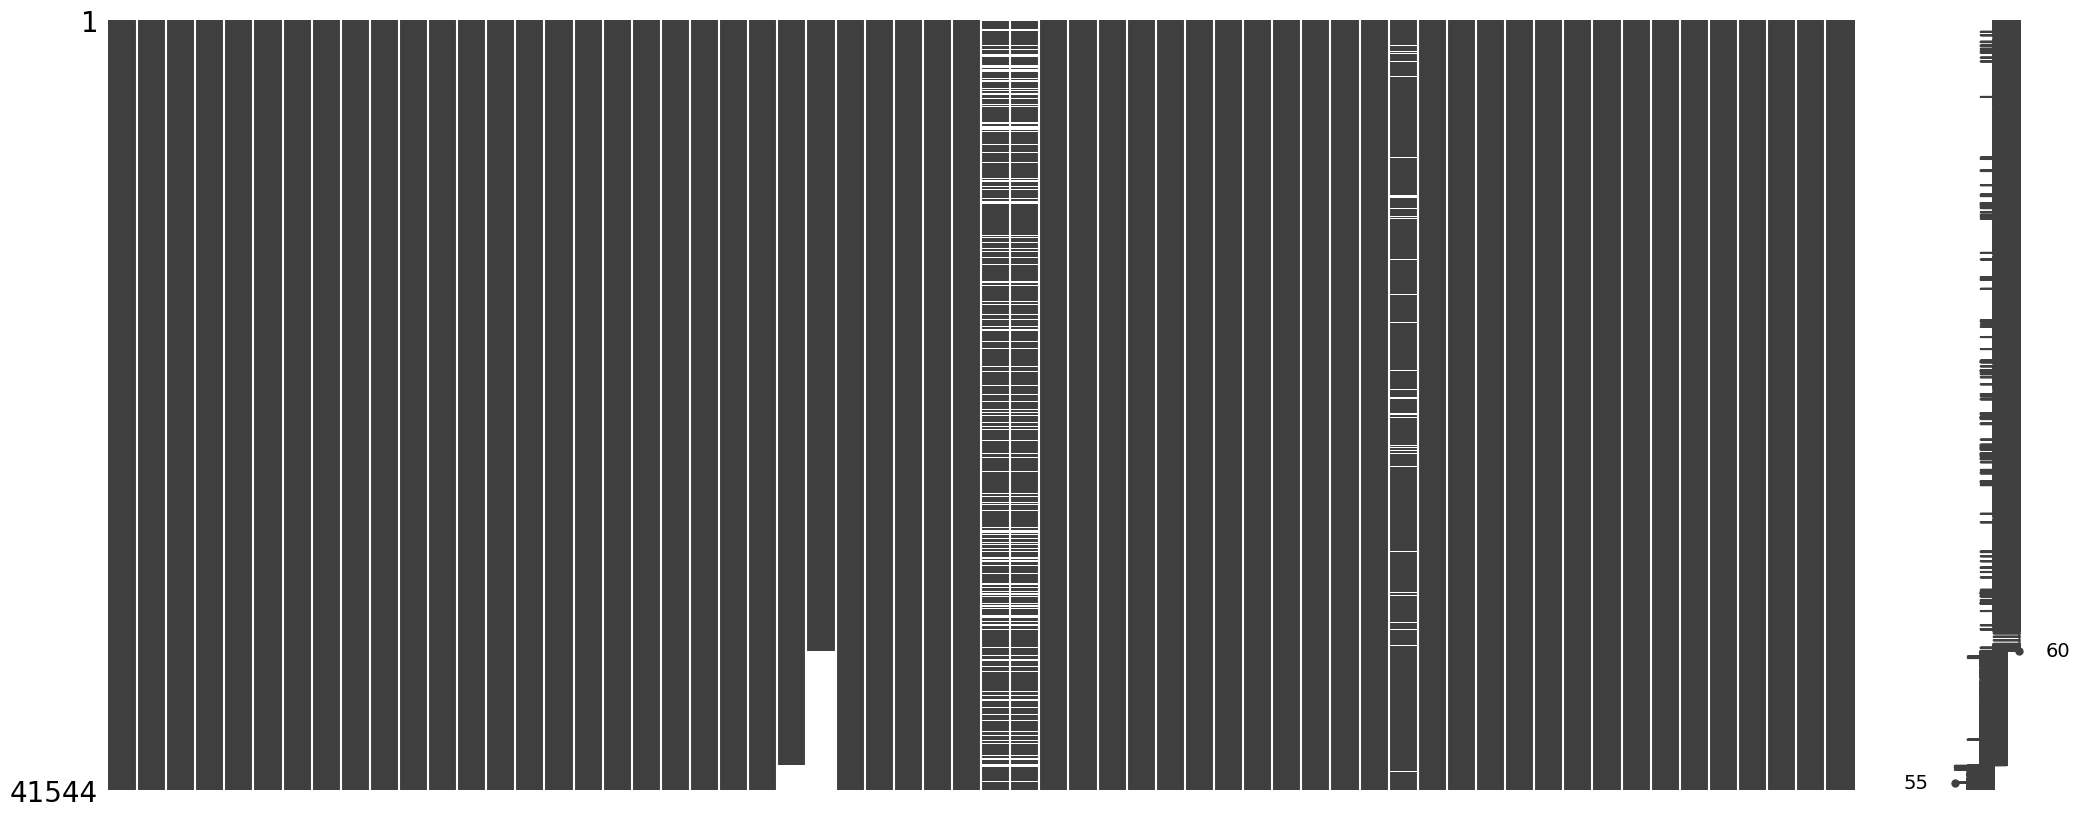

In [ ]:
msno.matrix(df)

In [ ]:
# Mengatur agar semua kolom dan baris ditampilkan
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Menghitung jumlah nilai missing (NaN) di setiap kolom
missing_values = df.isnull().sum()

# Menampilkan hanya kolom yang memiliki nilai missing value
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Crop Farming and Gardening expenses             1336
Total Income from Entrepreneurial Acitivites    7503
Household Head Occupation                       7536
Household Head Class of Worker                  7536
Toilet Facilities                               1580
dtype: int64


In [ ]:
# Handling Missing value with 0
df['Crop Farming and Gardening expenses'] = df['Crop Farming and Gardening expenses'].fillna(0)
df['Total Income from Entrepreneurial Acitivites'] = df['Total Income from Entrepreneurial Acitivites'].fillna(0)

# Menghitung modus dari kolom 'Toilet Facilities'
mode_toilet = df['Toilet Facilities'].mode()[0]

# Mengisi nilai yang hilang dengan modus
df['Toilet Facilities'] = df['Toilet Facilities'].fillna(mode_toilet)

# Menghapus baris dengan missing value di kolom Household Head Occupation dan Household Head Class of Worker
df = df.dropna()

# Feature Engineering

## Total Household Income

In [ ]:
df['Total Household Income'] += df['Total Income from Entrepreneurial Acitivites']

<ipython-input-47-28b192cee7a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Household Income'] += df['Total Income from Entrepreneurial Acitivites']


In [ ]:
df.drop(['Total Income from Entrepreneurial Acitivites'],axis=1,inplace=True)

<ipython-input-48-9445ce728e81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Total Income from Entrepreneurial Acitivites'],axis=1,inplace=True)


In [ ]:
df['Total Household Income (Monthly)'] = df['Total Household Income']/12
target_new = 'Total Household Income (Monthly)'
df[target_new] = df[target_new].astype(float)
df[target_new].describe()

<ipython-input-49-cb3301806d5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Household Income (Monthly)'] = df['Total Household Income']/12
<ipython-input-49-cb3301806d5a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_new] = df[target_new].astype(float)


count    3.400800e+04
mean     7.722390e+06
std      8.982187e+06
min      3.673361e+05
25%      3.473865e+06
50%      5.289668e+06
75%      8.861988e+06
max      3.605316e+08
Name: Total Household Income (Monthly), dtype: float64

## Total Expenses and Expenses Category

In [ ]:
total_expense_columns = ['Total Food Expenditure',
                         'Communication Expenditure',
                         'Housing and water Expenditure',
                         'Transportation Expenditure',
                         'Clothing, Footwear and Other Wear Expenditure',
                         'Meat Expenditure',
                         'Restaurant and hotels Expenditure',
                         'Fruit Expenditure',
                         'Education Expenditure',
                         'Miscellaneous Goods and Services Expenditure',
                         'Total Fish and  marine products Expenditure',
                         'Special Occasions Expenditure',
                         'Vegetables Expenditure',
                         'Medical Care Expenditure',
                         'Bread and Cereals Expenditure',
                         'Total Rice Expenditure',
                         'Alcoholic Beverages Expenditure',
                         'Crop Farming and Gardening expenses',
                         'Tobacco Expenditure',
                         'Imputed House Rental Value',
                         ]

# Menambahkan kolom baru dengan hasil penjumlahan kolom-kolom yang ada di total_expense_columns
df['Total Expenses'] = df[total_expense_columns].sum(axis=1)

<ipython-input-50-6a4e413a94fc>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Expenses'] = df[total_expense_columns].sum(axis=1)


In [ ]:
# Menghitung total pengeluaran untuk kebutuhan dan gaya hidup
needs_columns = ['Total Food Expenditure',
                 'Housing and water Expenditure',
                 'Transportation Expenditure',
                 'Education Expenditure',
                 'Medical Care Expenditure',
                 'Bread and Cereals Expenditure',
                 'Total Rice Expenditure',
                 'Meat Expenditure',
                 'Total Fish and  marine products Expenditure',
                 'Fruit Expenditure',
                 'Vegetables Expenditure',
                 'Imputed House Rental Value',
                 ]

lifestyle_columns = ['Communication Expenditure',
                     'Clothing, Footwear and Other Wear Expenditure',
                     'Restaurant and hotels Expenditure',
                     'Special Occasions Expenditure',
                     'Alcoholic Beverages Expenditure',
                     'Tobacco Expenditure',
                     'Miscellaneous Goods and Services Expenditure',
                     'Crop Farming and Gardening expenses']

df['Total Needs Expenses'] = df[needs_columns].sum(axis=1)
df['Total Lifestyle Expenses'] = df[lifestyle_columns].sum(axis=1)

<ipython-input-51-cc144b6a2735>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Needs Expenses'] = df[needs_columns].sum(axis=1)
<ipython-input-51-cc144b6a2735>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Lifestyle Expenses'] = df[lifestyle_columns].sum(axis=1)


* Category 1 - (< 25% of the distribution)
* Category 2 - (25%-50% of the distribution)
* Category 3 - (50%-75% of the distribution)
* Category 4 - (> 75% of the distribution)

In [ ]:
df['Total Expenses Category'] = pd.qcut(df['Total Expenses'], q=4, labels=['Category 1', 'Category 2', 'Category 3', 'Category 4'])

<ipython-input-52-79db65aa1cff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Expenses Category'] = pd.qcut(df['Total Expenses'], q=4, labels=['Category 1', 'Category 2', 'Category 3', 'Category 4'])


## Household Head Highest Grade Completed (Simplified)

In [ ]:
for item in df['Household Head Highest Grade Completed'].value_counts().index :
    print(".", item)

educ_attainment = { 'DNA/Primary/Elementary' : ['Elementary Graduate', 'Grade 4', 'Grade 5', 'Grade 3', 'Grade 2', 'Grade 1', 'Grade 6', 'No Grade Completed', 'Preschool'],
                    'Secondary' : ['High School Graduate', 'Second Year High School', 'Third Year High School', 'First Year High School'],
                    'Attended College' : ['Second Year College', 'Third Year College', 'First Year College', 'Second Year Post Secondary', 'Fourth Year College', 'First Year Post Secondary'],
                    'Post Baccalaureate' : ['Post Baccalaureate'],
                    'Degrees/Programs' : ['Business and Administration Programs', 'Teacher Training and Education Sciences Programs', 'Engineering and Engineering Trades Programs', 'Engineering and Engineering trades Programs', 'Engineering and Engineering trades Programs', 'Health Programs', 'Computing/Information Technology Programs', 'Security Services Programs', 'Agriculture, Forestry, and Fishery Programs',
                                  'Transport Services Programs', 'Social and Behavioral Science Programs', 'Social and Behavioral Science Programs', 'Personal Services Programs', 'Humanities Programs', 'Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree',
                                  'Law Programs', 'Architecture and Building Programs', 'Basic Programs', 'Journalism and Information Programs', 'Arts Programs', 'Life Sciences Programs', 'Manufacturing and Processing Programs',
                                  'Social Services Programs', 'Physical Sciences Programs', 'Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree (HIgher Education Level, First Stage, or Collegiate Education Level)',
                                  'Veterinary Programs', 'Environmental Protection Programs'
                                 ]}

df['Household Head Highest Grade Completed (Simplified)'] = df['Household Head Highest Grade Completed'].apply(lambda x : ''.join([key for key in educ_attainment.keys() if x in educ_attainment[key]]))

. High School Graduate
. Elementary Graduate
. Grade 4
. Second Year High School
. Grade 5
. Grade 3
. Third Year High School
. First Year High School
. Grade 2
. Second Year College
. Business and Administration Programs
. No Grade Completed
. First Year College
. Grade 1
. Third Year College
. Engineering and Engineering Trades Programs
. Teacher Training and Education Sciences Programs
. Engineering and Engineering trades Programs
. Computing/Information Technology Programs
. Health Programs
. Security Services Programs
. Post Baccalaureate
. Grade 6
. Agriculture, Forestry, and Fishery Programs
. Transport Services Programs
. Second Year Post Secondary
. Social and Behavioral Science Programs
. Fourth Year College
. First Year Post Secondary
. Personal Services Programs
. Humanities Programs
. Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree
. Law Programs
. Architecture and 

In [ ]:
df['Household Head Highest Grade Completed (Simplified)'].unique()

array(['Degrees/Programs', 'DNA/Primary/Elementary', 'Secondary',
       'Attended College', 'Post Baccalaureate', ''], dtype=object)

## Income Category

In [ ]:
df['Income Category'] = pd.qcut(df['Total Household Income'], q=4, labels=['Category 1', 'Category 2', 'Category 3', 'Category 4'])

## Number of Kids

In [ ]:
df['Number of Kids'] = df['Members with age less than 5 year old'] + df['Members with age 5 - 17 years old']
df.drop(columns = ['Members with age less than 5 year old','Members with age 5 - 17 years old'], inplace = True)

## Number of Goods

In [ ]:
df['Number of Vehicles'] = df['Number of Car, Jeep, Van'] + df['Number of Motorcycle/Tricycle'] + df['Number of Motorized Banca']
df['Number of Communication Devices'] = df['Number of Landline/wireless telephones'] + df['Number of Cellular phone']
df['Number of Electronics'] = df['Number of Television'] +df['Number of CD/VCD/DVD'] +df['Number of Component/Stereo set'] +df['Number of Personal Computer']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34008 entries, 0 to 41542
Data columns (total 68 columns):
 #   Column                                               Non-Null Count  Dtype   
---  ------                                               --------------  -----   
 0   Total Household Income                               34008 non-null  float64 
 1   Region                                               34008 non-null  object  
 2   Total Food Expenditure                               34008 non-null  float64 
 3   Main Source of Income                                34008 non-null  object  
 4   Agricultural Household indicator                     34008 non-null  int64   
 5   Bread and Cereals Expenditure                        34008 non-null  float64 
 6   Total Rice Expenditure                               34008 non-null  float64 
 7   Meat Expenditure                                     34008 non-null  float64 
 8   Total Fish and  marine products Expenditure          34008 no

# Feature Importance

## **Numeric Feature Importance (Correlation Matrix)**





In [ ]:
# #Correlation Matrix (Matriks Korelasi)

# corr_matrix = numeric_df.corr()
# sns.heatmap(corr_matrix, cmap='coolwarm')
# plt.show()

# # Melihat korelasi dengan target
# corr_with_target = corr_matrix['Total Household Income'].sort_values(ascending=False)
# pd.set_option('display.max_rows', None)
# print(corr_with_target)

In [ ]:
# # Memisahkan baris yang memiliki "expenditure" dan yang tidak
# expenditure_series = corr_with_target[corr_with_target.index.str.contains('Expenditure', case=False) |
#                                       corr_with_target.index.str.contains('Expense', case=False)]

# non_expenditure_series = corr_with_target[~(corr_with_target.index.str.contains('Expenditure', case=False) |
#                                             corr_with_target.index.str.contains('Expense', case=False))]

# # Menampilkan hasil
# print("Importance Feature Expenditure(Correlation Matrix):")
# print(expenditure_series)

# print("\nImportance Feature Non-Expenditure(Correlation Matrix)")
# print(non_expenditure_series)

Importance Feature Expenditure(Correlation Matrix):
* Communication Expenditure                        0.710140
* Housing and water Expenditure                    0.676186
* Total Food Expenditure                           0.663660
* Transportation Expenditure                       0.639939
* Clothing, Footwear and Other Wear Expenditure    0.605992
* Meat Expenditure                                 0.567142
* Restaurant and hotels Expenditure                0.510017
* Fruit Expenditure                                0.448943
* Education Expenditure                            0.439593
* Miscellaneous Goods and Services Expenditure     0.439593
* Total Fish and  marine products Expenditure      0.395066
* Special Occasions Expenditure                    0.382596
* Vegetables Expenditure                           0.373222
* Medical Care Expenditure                         0.304145
* Bread and Cereals Expenditure                    0.276606
* Total Rice Expenditure                           0.162479
* Alcoholic Beverages Expenditure                  0.153384
* Crop Farming and Gardening expenses              0.129092
* Tobacco Expenditure                              0.068891
<br>
Name: Total Household Income, dtype: float64

<br><br>
Importance Feature Non-Expenditure(Correlation Matrix)
* Total Household Income                          1.000000
* Imputed House Rental Value                      0.574091
* Number of Personal Computer                     0.557561
* Number of Airconditioner                        0.551994
* Number of Car, Jeep, Van                        0.546663
* Number of Cellular phone                        0.488106
* Number of Television                            0.475170
* Number of Refrigerator/Freezer                  0.473454
* Number of Washing Machine                       0.443680
* Number of bedrooms                              0.385978
* Number of Stove with Oven/Gas Range             0.380141
* Number of CD/VCD/DVD                            0.345417
* Number of Landline/wireless telephones          0.343629
* House Floor Area                                0.343209
* Number of Component/Stereo set                  0.310519
* Number of Motorcycle/Tricycle                   0.231296
* Total number of family members employed         0.211099
* Electricity                                     0.176151
* Total Number of Family members                  0.145149
* Total Income from Entrepreneurial Acitivites    0.137703
* House Age                                       0.110912
* Household Head Age                              0.076983
* Agricultural Household indicator                0.020201
* Number of Motorized Banca                       0.005272
* Members with age less than 5 year old          -0.011301
* Members with age 5 - 17 years old              -0.052998
<br>
Name: Total Household Income, dtype: float64

## **Numeric Feature Importance dari Algoritma Tree-based**

In [ ]:
# # Menangani nilai NaN (imputasi dengan mean)
# numeric_df.fillna(numeric_df.mean(), inplace=True)

# # Memisahkan fitur (X) dan target (y)
# X = numeric_df.drop(columns=['Total Household Income'])
# y = numeric_df['Total Household Income']

# # Membuat dan melatih model
# model = RandomForestRegressor()
# model.fit(X, y)

# # Mendapatkan pentingnya fitur
# importances = model.feature_importances_
# feature_names = X.columns
# feature_importance_df_numeric_tree_based = pd.DataFrame({'feature': feature_names, 'importance': importances})
# feature_importance_df_numeric_tree_based = feature_importance_df_numeric_tree_based.sort_values(by='importance', ascending=False)

In [ ]:
# # Memisahkan fitur yang merupakan "expenditure" dan yang bukan
# expenditure_features_df_numeric = feature_importance_df_numeric_tree_based[feature_importance_df_numeric_tree_based['feature'].str.contains('Expenditure')]
# non_expenditure_features_df_numeric = feature_importance_df_numeric_tree_based[~feature_importance_df_numeric_tree_based['feature'].str.contains('Expenditure')]

# # Menampilkan kedua DataFrame tersebut
# print("Numeric Expenditure Features(Tree-Based Algorithm):")
# print(expenditure_features_df_numeric)

# print("\nNumeric Non-Expenditure Features(Tree-Based Algorithm):")
# print(non_expenditure_features_df_numeric)

Numeric Expenditure Features(Tree-Based Algorithm):
*                      Communication Expenditure    0.400419
*                  Housing and water Expenditure    0.151369
*                          Total Food Expenditure    0.080612
*                     Transportation Expenditure    0.037553
*  Clothing, Footwear and Other Wear Expenditure    0.037252
*     Total Fish and  marine products Expenditure    0.034106
*                  Special Occasions Expenditure    0.029847
*                       Medical Care Expenditure    0.022479
*               Restaurant and hotels Expenditure    0.010896
*                   Bread and Cereals Expenditure    0.010790
*                               Fruit Expenditure    0.010365
*                          Vegetables Expenditure    0.008905
*                          Total Rice Expenditure    0.007947
*                                Meat Expenditure    0.007701
*                          Education Expenditure    0.007423
*                 Alcoholic Beverages Expenditure    0.007401
*   Miscellaneous Goods and Services Expenditure    0.007047
*                            Tobacco Expenditure    0.002806
<br><br>

Numeric Non-Expenditure Features(Tree-Based Algorithm):
*                      Number of Car, Jeep, Van    0.023847
*                    Imputed House Rental Value    0.009927
*                                     House Age    0.009863
*           Crop Farming and Gardening expenses    0.008918
*  Total Income from Entrepreneurial Acitivites    0.007652
*                      Number of Airconditioner    0.006824
*                 Number of Motorcycle/Tricycle    0.006684
*                            Household Head Age    0.006385
*                              House Floor Area    0.006019
*       Total number of family members employed    0.004579
*                   Number of Personal Computer    0.004314
*                          Number of Television    0.004170
*                            Number of bedrooms    0.003778
*                Total Number of Family members    0.003531
*                      Number of Cellular phone    0.003156
*                Number of Refrigerator/Freezer    0.002933
*                     Number of Washing Machine    0.002213
*         Members with age less than 5 year old    0.002020
*             Members with age 5 - 17 years old    0.001859
*                          Number of CD/VCD/DVD    0.001452
*           Number of Stove with Oven/Gas Range    0.001332
*                Number of Component/Stereo set    0.001313
*        Number of Landline/wireless telephones    0.000933
*               Agricultural Household indicator    0.000725
*                                   Electricity    0.000342
*                     Number of Motorized Banca    0.000313


                                          feature  importance
16                      Communication Expenditure    0.396840
12                  Housing and water Expenditure    0.156639
0                          Total Food Expenditure    0.081886
11  Clothing, Footwear and Other Wear Expenditure    0.038655
15                     Transportation Expenditure    0.036706
5     Total Fish and  marine products Expenditure    0.033288
19                  Special Occasions Expenditure    0.028646
37                       Number of Car, Jeep, Van    0.027465
14                       Medical Care Expenditure    0.021968
8               Restaurant and hotels Expenditure    0.011933
2                   Bread and Cereals Expenditure    0.011755
13                     Imputed House Rental Value    0.010683
6                               Fruit Expenditure    0.009057
20            Crop Farming and Gardening expenses    0.008894
28                                      House Age    0.008882
7                          Vegetables Expenditure    0.008190
21   Total Income from Entrepreneurial Acitivites    0.007977
4                                Meat Expenditure    0.007436
3                          Total Rice Expenditure    0.007313
17                          Education Expenditure    0.007166
18   Miscellaneous Goods and Services Expenditure    0.006965
22                             Household Head Age    0.006846
9                 Alcoholic Beverages Expenditure    0.006537
36                       Number of Airconditioner    0.005864
27                               House Floor Area    0.005775
43                  Number of Motorcycle/Tricycle    0.004866
26        Total number of family members employed    0.004559
40                    Number of Personal Computer    0.004486
29                             Number of bedrooms    0.003740
23                 Total Number of Family members    0.003588
39                       Number of Cellular phone    0.003471
10                            Tobacco Expenditure    0.003228
31                           Number of Television    0.003225
35                      Number of Washing Machine    0.003012
34                 Number of Refrigerator/Freezer    0.002515
25              Members with age 5 - 17 years old    0.002043
24          Members with age less than 5 year old    0.001567
32                           Number of CD/VCD/DVD    0.001508
41            Number of Stove with Oven/Gas Range    0.001476
33                 Number of Component/Stereo set    0.001184
38         Number of Landline/wireless telephones    0.001016
1                Agricultural Household indicator    0.000649
30                                    Electricity    0.000284
42                      Number of Motorized Banca    0.000214

## Feature Importance RandomForestRegressor with Encoding Categorical Feature

In [ ]:
df.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

In [ ]:
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder

# # Misalkan df adalah DataFrame yang memuat data Anda

# # Memisahkan fitur numerik dan kategorikal
# numeric_features = df.select_dtypes(include=['number']).columns.tolist()
# categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# # Menghapus kolom target dari daftar fitur numerik
# numeric_features.remove('Total Household Income')

# # Definisikan preprocessors untuk fitur numerik dan kategorikal
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median'))
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Menggabungkan preprocessors menggunakan ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# # Definisikan pipeline model
# model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', RandomForestRegressor())
# ])

# # Memisahkan fitur (X) dan target (y)
# X = df.drop(columns=['Total Household Income'])
# y = df['Total Household Income']

# # Melatih model
# model.fit(X, y)

# # Mendapatkan importance fitur
# regressor = model.named_steps['regressor']
# importances = regressor.feature_importances_

# # Mendapatkan nama fitur yang sudah di-encode
# encoded_feature_names = numeric_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))

# # Membuat DataFrame untuk feature importance
# feature_importance_df = pd.DataFrame({'feature': encoded_feature_names, 'importance': importances})
# feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# print(feature_importance_df)


In [ ]:
# # Memisahkan fitur yang merupakan "expenditure" dan yang bukan
# expenditure_features_df = feature_importance_df[feature_importance_df['feature'].str.contains('Expenditure')]
# non_expenditure_features_df = feature_importance_df[~feature_importance_df['feature'].str.contains('Expenditure')]

# # Menampilkan kedua DataFrame tersebut
# print("Expenditure Features:")
# print(expenditure_features_df)

# print("\nNon-Expenditure Features:")
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# print(non_expenditure_features_df)
# # print(non_expenditure_features_df.to_string())

In [ ]:
# non_expenditure_features_df.to_excel("non_expenditure_features.xlsx", index=False)

Expenditure Features(RandomForestRegressor):

                                          feature  importance
*                       Communication Expenditure    0.396306
*                   Housing and water Expenditure    0.150230
*                           Total Food Expenditure    0.084576
*                      Transportation Expenditure    0.031720
*   Clothing, Footwear and Other Wear Expenditure    0.030464
*      Total Fish and  marine products Expenditure    0.025081
*                   Special Occasions Expenditure    0.024557
*                        Medical Care Expenditure    0.020269
*                Restaurant and hotels Expenditure    0.009992
*                    Bread and Cereals Expenditure    0.008807
*                           Vegetables Expenditure    0.006979
*                                Fruit Expenditure    0.006782
*                           Total Rice Expenditure    0.006246
*                                 Meat Expenditure    0.005639
*    Miscellaneous Goods and Services Expenditure    0.005415
*                           Education Expenditure    0.005103
*                  Alcoholic Beverages Expenditure    0.004566
*                             Tobacco Expenditure    0.002237

# Export Final Dataset


In [ ]:
df.to_excel("final_dataset_converted_rupiah.xlsx", index=False)